In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV as logCV
from sklearn.ensemble import RandomForestClassifier
#import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score,auc
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df_original = pd.read_csv('online_shoppers_intention.csv')
feature_names = df_original.columns.tolist()

Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

Administrative - 浏览行政网页数

Administrative_Duration - 浏览行政类网页总时长

Informational - 浏览信息类网页数

Informational_Duration - 浏览信息类网页总时长

ProductRelated - 浏览产品类网页数

ProductRelated_Duration - 浏览产品类网页总时长

BounceRates - 进入无交互百分比 (可能误点)

ExitRates - 特定页面退出百分比

PageValues - （待定）

SpecialDay - 浏览日离下一个节日的

***Month - 浏览行为发生的月份

OperatingSystems - 操作系统（8个类型）

Browser - 浏览器（13个类型）

Region - 地区（9个地区）

TrafficType - 卡顿情况（20种）

***VisitorType - 用户类型（三种）

***Weekend - 是否周末浏览

***Revenue - 是否完成购买

In [3]:
df_original.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df_original.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Data Encoding for Month and VisitorType

In [6]:
# Transfer All non-numi data into num.
# Month, VisitorType, Weekend, Revenue
# Data Missing January and April
df_encoded = df_original.copy()
month_to_code = {
    'January': 1,
    'Feb': 2,
    'Mar': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
# One hot encode
df_encoded = pd.get_dummies(df_encoded, prefix='VisitorType', columns=['VisitorType'])
# 使用map函数将月份列编码为1到12
df_encoded['Month'] = df_encoded['Month'].map(month_to_code)
df_encoded['Weekend'] = df_encoded['Weekend'].astype(int)
df_encoded['Revenue'] = df_encoded['Revenue'].astype(int)

In [7]:
df_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,0,1


In [8]:
df_encoded.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745,0.137388,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676,0.344271,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Outlier Detection & Abnormal Rows

In [9]:
abnormal_rows = df_encoded[((df_encoded['Administrative'] == 0) & (df_encoded["Administrative_Duration"] != 0))\
                           |((df_encoded['Administrative'] != 0) & (df_encoded["Administrative_Duration"] == 0))\
                            |((df_encoded['Informational'] == 0) & (df_encoded["Informational_Duration"] != 0))\
                                |((df_encoded['Informational'] != 0) & (df_encoded["Informational_Duration"] == 0))\
                                    |((df_encoded['ProductRelated'] == 0) & (df_encoded["ProductRelated_Duration"] != 0))\
                                        |((df_encoded['ProductRelated'] != 0) & (df_encoded["ProductRelated_Duration"] == 0))]

In [10]:
abnormal_rows

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,0,0,0,0,1
2,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,0,0,0,0,1
6,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.4,2,2,4,3,3,0,0,0,0,1
7,1,0.0,0,0.00,0,0.000000,0.200000,0.200000,0.0,0.0,2,1,2,1,5,1,0,0,0,1
16,0,0.0,0,0.00,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,4,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12257,0,0.0,1,0.00,22,812.300000,0.030849,0.057391,0.0,0.0,11,1,1,4,10,1,0,0,0,1
12301,0,0.0,0,0.00,2,0.000000,0.200000,0.200000,0.0,0.0,11,1,1,4,1,0,0,0,0,1
12311,1,0.0,2,211.25,144,4627.489571,0.001361,0.020664,0.0,0.0,11,2,2,1,2,0,1,0,0,1
12321,0,0.0,0,0.00,6,0.000000,0.200000,0.200000,0.0,0.0,11,1,8,4,1,0,0,0,0,1


In [11]:
df_encoded_cleaned = df_encoded.copy()
df_encoded_cleaned = df_encoded.drop(abnormal_rows.index)

In [12]:
df_encoded_cleaned.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,1,0,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,0,0,0,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,2,3,0,0,0,0,1


In [13]:
## Outlier

import numpy as np

def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
    return outliers

# Selecting columns to check for outliers (you might need to adjust this based on your actual data)
columns_to_check = ['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                   'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

outliers_dict = detect_outliers_iqr(df_encoded_cleaned, columns_to_check)
#for column, outlier_indices in outliers_dict.items():
#    print(f"Outliers for {column}: {outlier_indices}")
outlier_index = set()
for key in outliers_dict:
    print("Outliers for",key, len(outliers_dict[key]))
    outlier_index |= set(outliers_dict[key])
print("\nunion index of outliers", len(outlier_index))

Outliers for Administrative 391
Outliers for Administrative_Duration 1002
Outliers for Informational 2373
Outliers for Informational_Duration 2373
Outliers for ProductRelated 953
Outliers for ProductRelated_Duration 876
Outliers for BounceRates 1176
Outliers for ExitRates 847
Outliers for PageValues 2633
Outliers for SpecialDay 1140

union index of outliers 6466


In [14]:
df_outliers = df_encoded_cleaned.loc[outlier_index]

In [15]:
outlier_desc = df_outliers.describe()
outlier_desc

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000
mean,3.203835,124.121570,0.914166,65.330176,43.871018,1698.882256,0.016132,0.037385,10.934129,0.107021,7.621095,2.125889,2.340860,3.095886,4.081503,0.231055,0.253789,0.111816,0.004485,0.883699
std,3.925748,227.549185,1.631921,188.917341,55.686625,2419.863476,0.027270,0.036188,24.326332,0.253526,3.255495,0.846587,1.656726,2.351237,4.018212,0.421540,0.435212,0.315164,0.066825,0.320610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,11.000000,326.125000,0.000000,0.013333,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,39.837500,0.000000,0.000000,25.500000,952.360119,0.004640,0.023442,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,157.252083,1.000000,37.750000,55.000000,2120.391918,0.018182,0.048425,11.728530,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


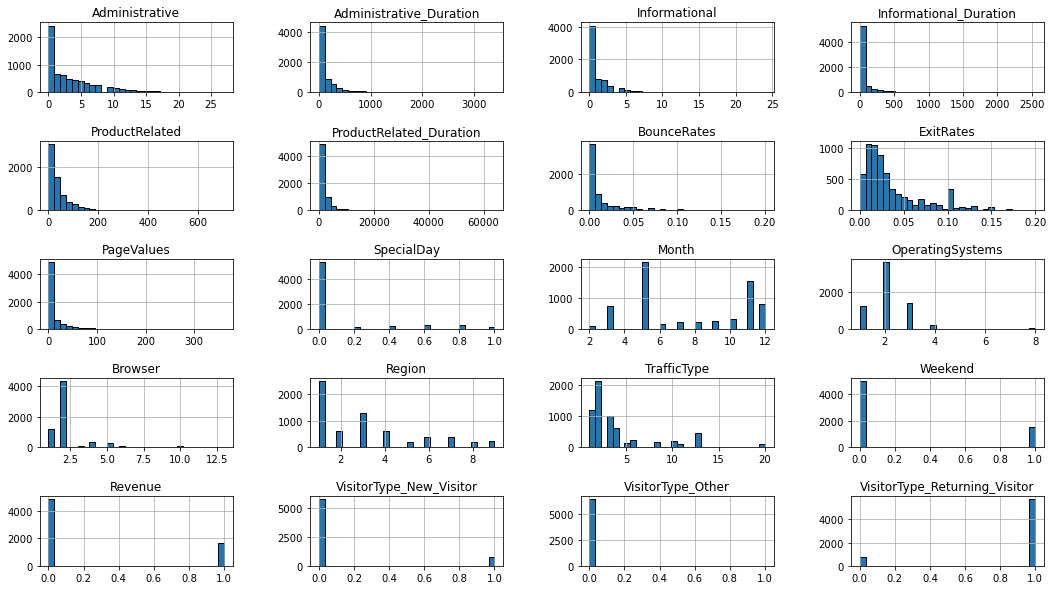

In [16]:
import matplotlib.pyplot as plt
df_outliers.hist(figsize=(18, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [17]:
outlier_desc = df_outliers.describe()
outlier_desc

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000
mean,3.203835,124.121570,0.914166,65.330176,43.871018,1698.882256,0.016132,0.037385,10.934129,0.107021,7.621095,2.125889,2.340860,3.095886,4.081503,0.231055,0.253789,0.111816,0.004485,0.883699
std,3.925748,227.549185,1.631921,188.917341,55.686625,2419.863476,0.027270,0.036188,24.326332,0.253526,3.255495,0.846587,1.656726,2.351237,4.018212,0.421540,0.435212,0.315164,0.066825,0.320610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,11.000000,326.125000,0.000000,0.013333,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,39.837500,0.000000,0.000000,25.500000,952.360119,0.004640,0.023442,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,157.252083,1.000000,37.750000,55.000000,2120.391918,0.018182,0.048425,11.728530,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df_wo_outliers = df_encoded_cleaned.drop(outlier_index)
wo_outlier_desc = df_wo_outliers.describe()
wo_outlier_desc

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,4795.000000,4795.000000,4795.0,4795.0,4795.000000,4795.000000,4795.000000,4795.000000,4795.0,4795.0,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000
mean,1.449426,35.042996,0.0,0.0,19.389781,674.279677,0.005126,0.027686,0.0,0.0,7.769969,2.117414,2.385193,3.233994,3.970594,0.242127,0.037331,0.189781,0.007925,0.802294
std,2.081690,54.522421,0.0,0.0,16.338108,682.154524,0.008306,0.017976,0.0,0.0,3.538491,0.950912,1.770968,2.461784,3.894865,0.428416,0.189590,0.392169,0.088678,0.398311
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.0,7.000000,187.000000,0.000000,0.013333,0.0,0.0,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.0,0.0,14.000000,437.200000,0.000000,0.024932,0.0,0.0,8.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,55.400000,0.0,0.0,26.000000,918.770833,0.008696,0.040000,0.0,0.0,11.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10.000000,252.500000,0.0,0.0,84.000000,3478.750000,0.033000,0.084375,0.0,0.0,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
result = pd.concat([outlier_desc, wo_outlier_desc], axis=0, keys=['outlier', 'non_outlier'])
result.to_csv('combined_describe_results.csv')

/Users/emma/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


1126


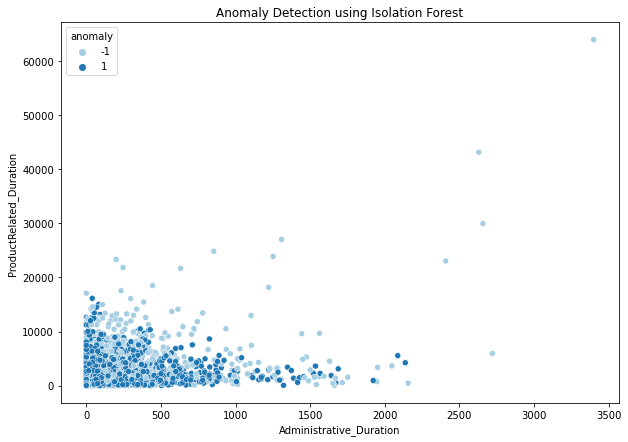

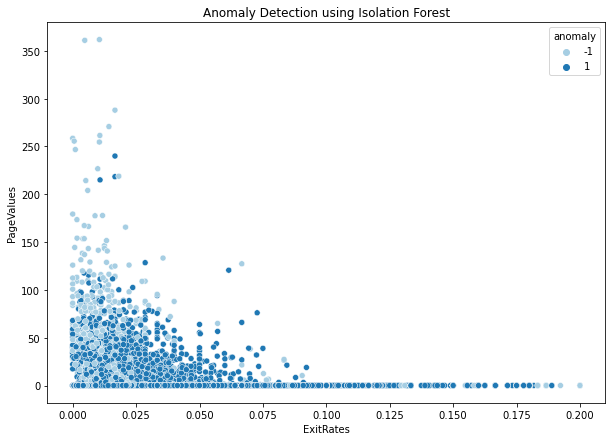

In [20]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# 您提供的数据


df = df_encoded_cleaned.copy()

# 创建IsolationForest模型
clf = IsolationForest(contamination=0.1)  # contamination参数可以调整，用于指定数据集中异常值的比例
clf.fit(df)

# 对数据进行预测
pred = clf.predict(df)

# 将预测结果添加到数据框中
df["anomaly"] = pred
outlier_index_if = df[df["anomaly"] == -1].index

# 显示被检测为异常值的数据点
outliers = df[df["anomaly"] == -1]
print(len(outliers))

# 可视化结果（假设我们仅可视化"Administrative_Duration"和"ProductRelated_Duration"两个特征）
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="Administrative_Duration", y="ProductRelated_Duration", hue="anomaly", palette="Paired")
plt.title("Anomaly Detection using Isolation Forest")
plt.show()

# 可视化结果（假设我们仅可视化"Administrative_Duration"和"ProductRelated_Duration"两个特征）
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="ExitRates", y="PageValues", hue="anomaly", palette="Paired")
plt.title("Anomaly Detection using Isolation Forest")
plt.show()

In [21]:
set(outlier_index_if)
set(outlier_index)
outlier_index_inter = outlier_index_if & outlier_index
print(len(outlier_index_inter))

1042


<ipython-input-21-d57bf2b41598>:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  outlier_index_inter = outlier_index_if & outlier_index


# Detail for Month vs Revenue

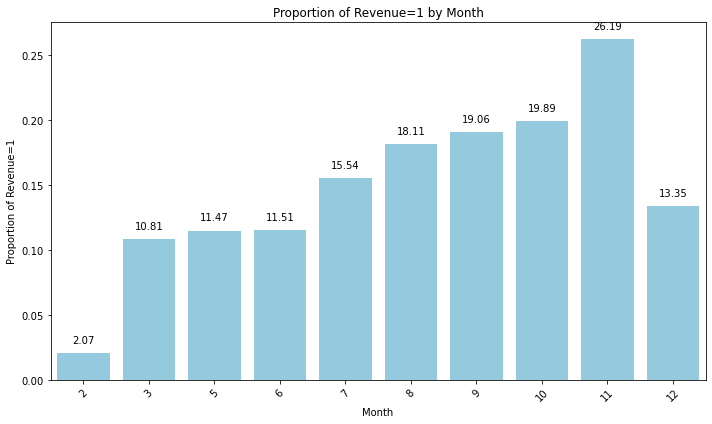

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算每月的Revenue为1的比例
revenue_proportion = df_encoded_cleaned.groupby('Month')['Revenue'].mean()

# 生成条形图
plt.figure(figsize=(10,6))
ax = sns.barplot(x=revenue_proportion.index, y=revenue_proportion.values, color='skyblue')
# 在每个条形上方标注具体的值
for i, v in enumerate(revenue_proportion.values):
    ax.annotate(format(v*100, '.2f'), 
                (i, v + 0.01), 
                ha='center', va='center',
                fontsize=10, color='black')
plt.title('Proportion of Revenue=1 by Month')
plt.ylabel('Proportion of Revenue=1')
plt.xlabel('Month')
plt.xticks(rotation=45)  # 如果月份名称很长，可以旋转x轴标签
plt.tight_layout()
plt.show()

# Feature Engneering

In [23]:
# create new columns
df_enriched = df_encoded_cleaned.copy()

page = ['Administrative','Informational','ProductRelated']
for i in range(3):
    df_enriched[f'{page[i]}_Browsingdepth'] = df_enriched[f'{page[i]}'] / df_enriched[f'{page[i]}_Duration']
    df_enriched[f'{page[i]}_Browsingdepth'].fillna(0,inplace=True)

# bring target value to the last column
target = df_enriched['Revenue']
df_enriched.drop(columns=['Revenue'], inplace=True)
df_enriched['Revenue'] = target

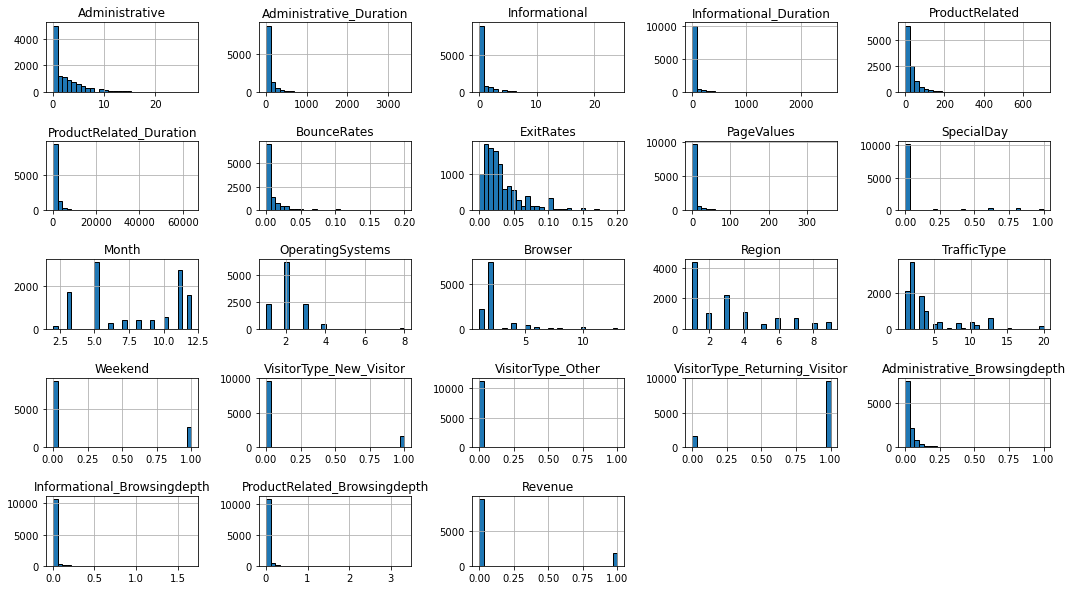

In [24]:
import matplotlib.pyplot as plt
df_enriched.hist(figsize=(18, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [25]:
df_enriched.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Administrative_Browsingdepth',
       'Informational_Browsingdepth', 'ProductRelated_Browsingdepth',
       'Revenue'],
      dtype='object')

In [26]:
Ordinal_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Administrative_Browsingdepth',
       'Informational_Browsingdepth', 'ProductRelated_Browsingdepth']

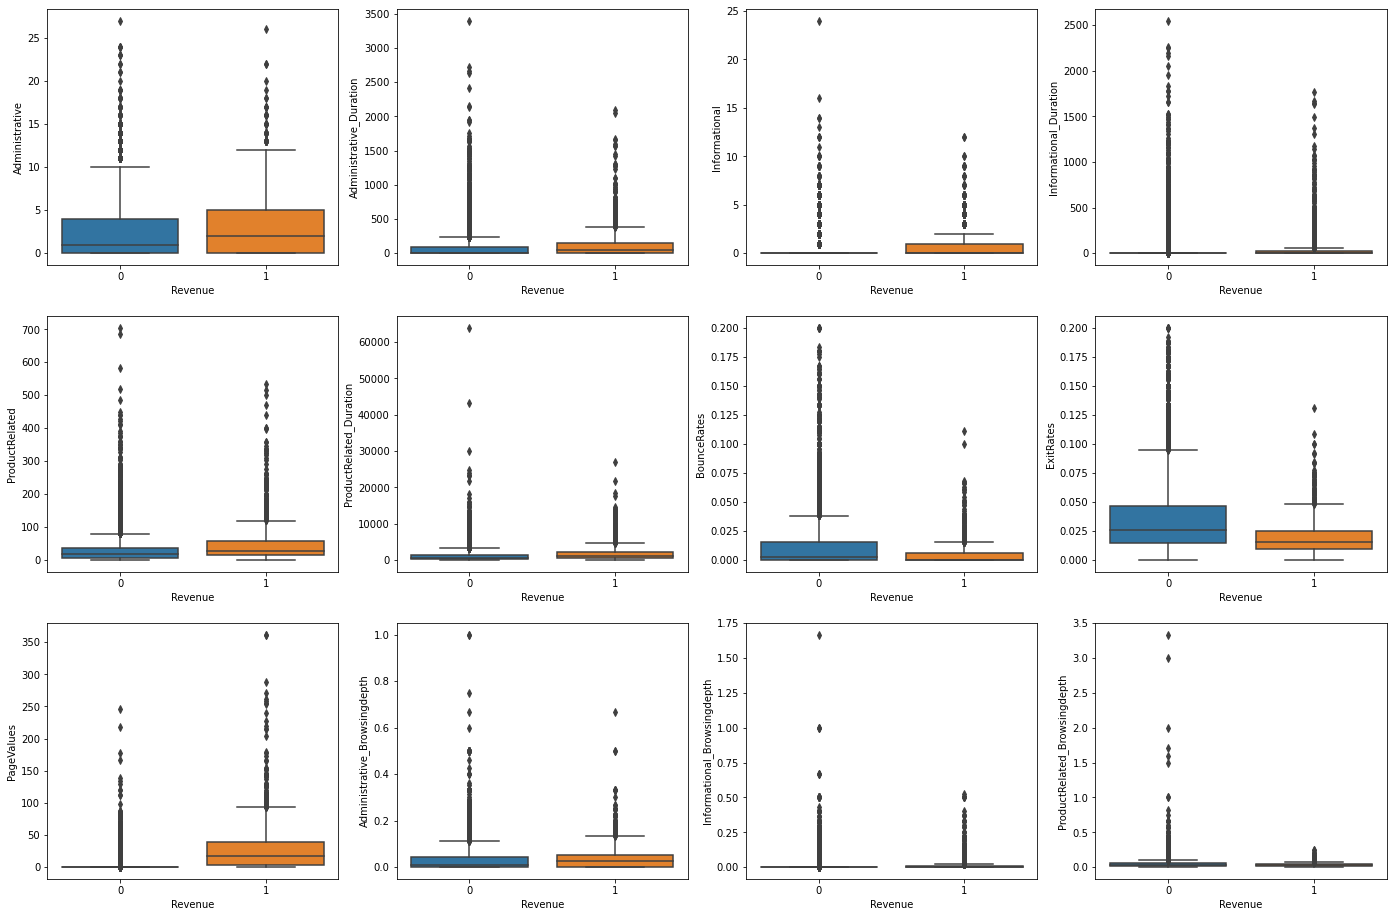

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 16))

# 遍历每个图，绘制箱形图
for i, column in enumerate(Ordinal_columns):
    row = i // 4  # 计算行索引
    col = i % 4   # 计算列索引
    sns.boxplot(x='Revenue', y=column, data=df_enriched, ax=axes[row, col])

plt.show()

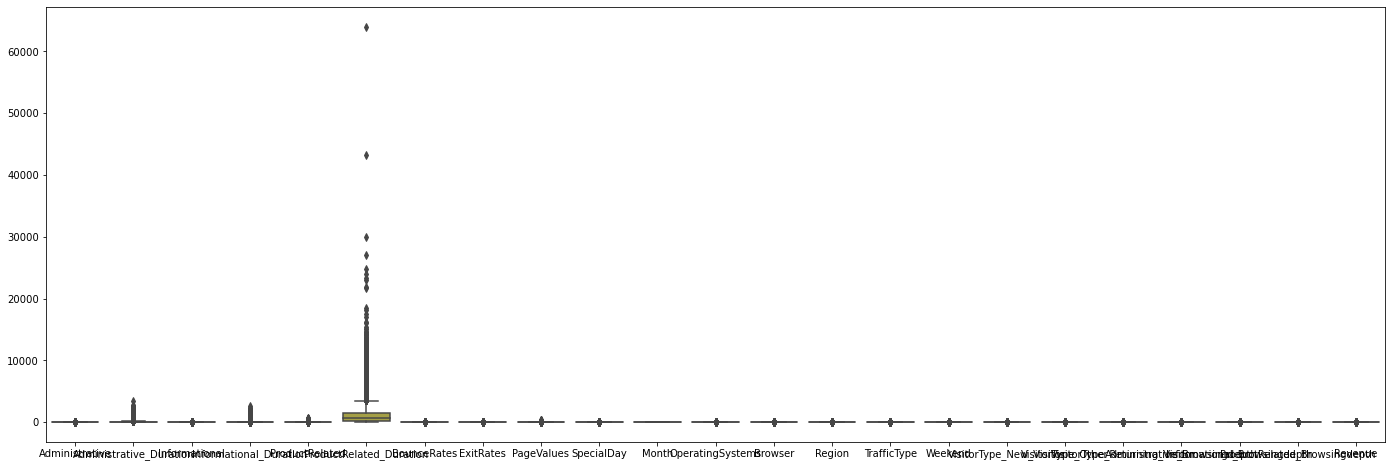

In [28]:
plt.figure(figsize=(24,8))
sns.boxplot(data=df_enriched)
plt.show()

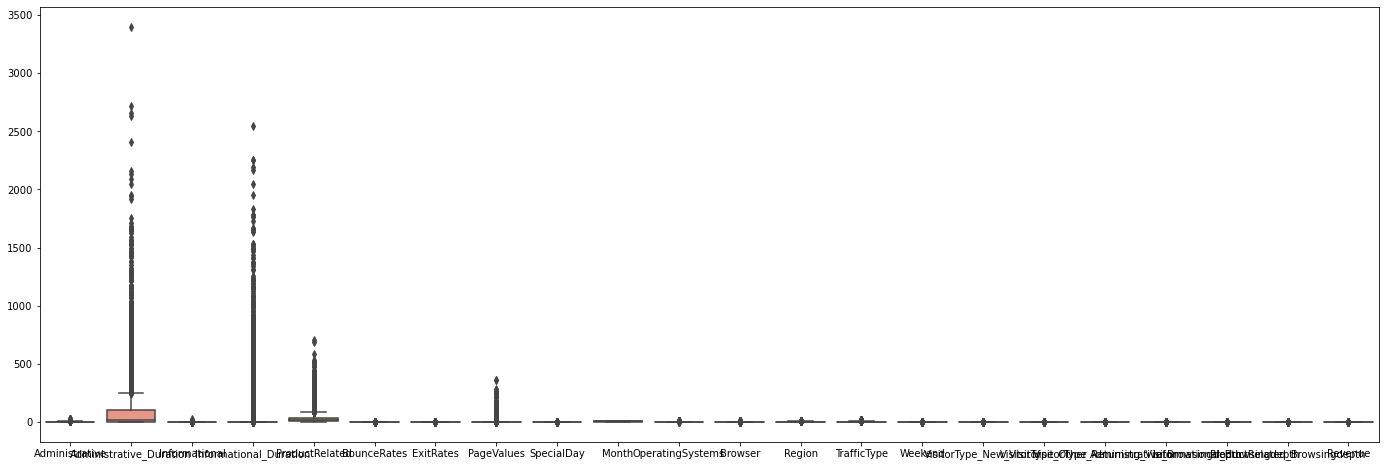

In [29]:
plt.figure(figsize=(24,8))
sns.boxplot(data=df_enriched.drop(columns="ProductRelated_Duration"))
plt.show()

# Heat Map

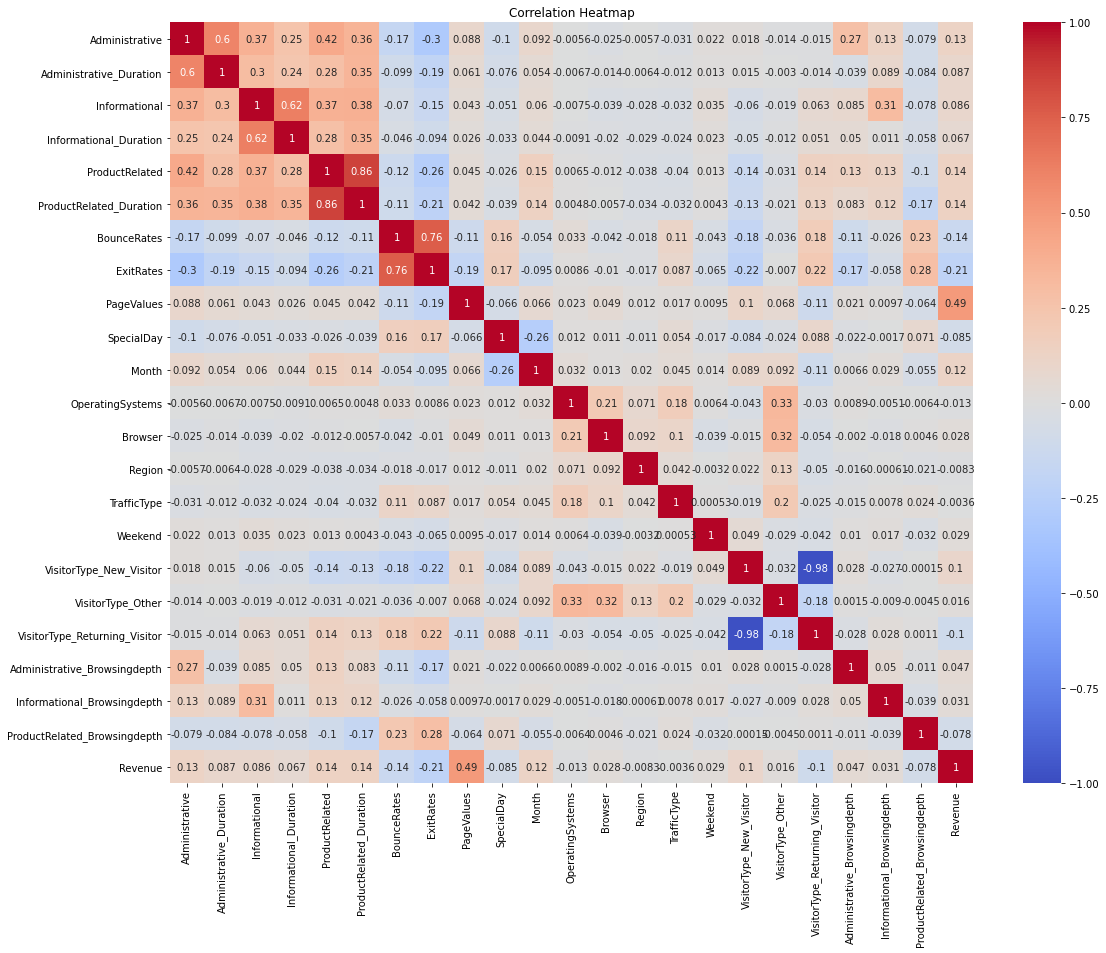

In [30]:
def heat_map(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(18, 14))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Heatmap")
    plt.show()
heat_map(df_enriched)

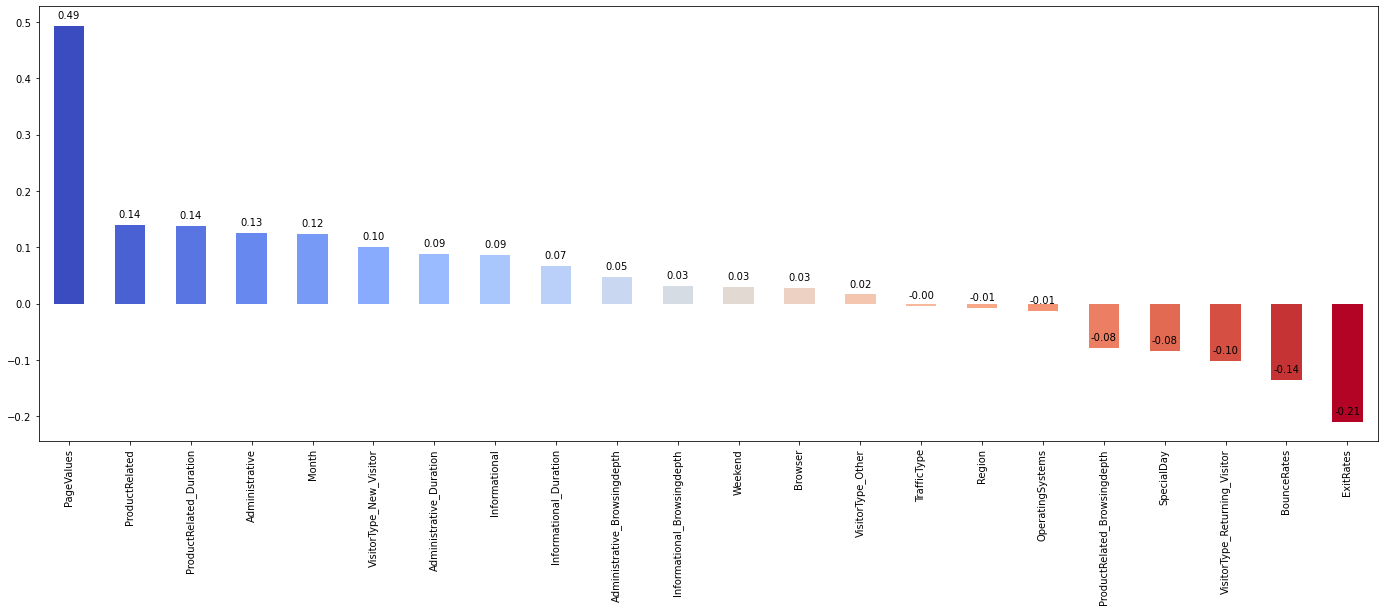

In [31]:
plt.figure(figsize=(24,8))
correlations = df_enriched.drop(columns="Revenue").corrwith(df_enriched['Revenue']).sort_values(ascending=False)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(x) for x in np.linspace(0, 1, len(correlations))]
bars = correlations.plot(kind='bar', color = colors)
# 标记correlation值
for i, v in enumerate(correlations):
    bars.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
plt.show()

# Pre-process the data (normalizing & standardizing) & Log Transformation

In [32]:
# pre_process
def pre_process(df, method, feature_list):
    """
    pre-process the data frame

    param df: The data frame need to be pre-processed
    param method: 'normalizing' or 'standardizing'
    param feature_list: feature list of the data frame
    """ 
    scaler = None
    if method == 'normalizing':
        scaler = MinMaxScaler()
    elif method == 'standardizing':
        scaler = StandardScaler()
    if scaler:
        df[feature_list] = scaler.fit_transform(df[feature_list])
    else:
        print("Wrong Method Name")

def log_transform(df, columns, base=np.e, add_constant=1):
    transformed_df = df.copy()
    for col in columns:
        transformed_df[col] = np.log(transformed_df[col] + add_constant) / np.log(base)
    return transformed_df
# Example usage
# Ordinal_columns = ['Administrative', 'Administrative_Duration', 'Informational',
#       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
#       'BounceRates', 'ExitRates', 'PageValues', 'Administrative_Browsingdepth',
#       'Informational_Browsingdepth', 'ProductRelated_Browsingdepth']
# df_norm = pre_process(df_original, 'normalizing', Ordinal_columns)
# df_std = pre_process(df_original, 'standardizing', Ordinal_columns)
# df_log = log_transform(df_original, Ordinal_columns)

# ANOVA Table

In [33]:
def generate_anova_table(df):
    """
    Generate an ANOVA table.

    Parameters:
    - df: DataFrame containing the data

    Returns:
    - ANOVA table as a DataFrame
    """
    feature_names = df.columns.tolist()
    target_vari_name = feature_names[-1]
    formula = target_vari_name + ' ~ '
    for feat_name in feature_names[:-1]:
        formula += feat_name + ' + '
    formula = formula[:-3]
    # Fit the model
    model = ols(formula, data=df).fit()
    
    # ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_table = anova_table.round(3)    
    def color_significant_pvalues(val):
        """
        Colors the p-values that are below 0.05.
        """
        color = 'red' if (isinstance(val, float) and val < 0.05) else 'black'
        return f'color: {color}'

    styled_table = anova_table.style.applymap(color_significant_pvalues, subset=['PR(>F)'])
    return styled_table
anova_table = generate_anova_table(df_enriched)
anova_table

,sum_sq,df,F,PR(>F)
Administrative,0.108000,1.000000,1.097000,0.295000
Administrative_Duration,0.007000,1.000000,0.066000,0.797000
Informational,0.021000,1.000000,0.218000,0.641000
Informational_Duration,0.084000,1.000000,0.856000,0.355000
ProductRelated,0.359000,1.000000,3.646000,0.056000
ProductRelated_Duration,1.151000,1.000000,11.689000,0.001000
BounceRates,0.044000,1.000000,0.442000,0.506000
ExitRates,3.467000,1.000000,35.216000,0.000000
PageValues,311.052000,1.000000,3159.130000,0.000000
SpecialDay,0.362000,1.000000,3.676000,0.055000


# Modelling

In [34]:
df_final = df_enriched.copy()

In [35]:
df_final['Revenue'].value_counts()

0    9441
1    1820
Name: Revenue, dtype: int64

Deal with unbalanced data

In [36]:
X = df_final.drop('Revenue', axis=1) 
y = df_final['Revenue'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

print(X_train.shape)
print(X_test.shape)

(9008, 22)
(2253, 22)


In [37]:
# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
prediction1=model1.predict(X_test)
print('Accuracy for model1 lr is ',metrics.accuracy_score(prediction1,y_test))
print('precision',precision_score(y_test, prediction1, average='binary'))
print('recall',recall_score(y_test, prediction1, average='binary'))
print('f1_score',f1_score(y_test, prediction1, average='binary'))
print('\n')

model2 = LogisticRegression(class_weight='balanced') #Assign weights to different categories
model2.fit(X_train,y_train)
prediction2=model2.predict(X_test)
print('Accuracy for model2 lr is ',metrics.accuracy_score(prediction2,y_test))
print('precision',precision_score(y_test, prediction2, average='binary'))
print('recall',recall_score(y_test, prediction2, average='binary'))
print('f1_score',f1_score(y_test, prediction2, average='binary'))

Accuracy for model1 lr is  0.8832667554371949
precision 0.7437185929648241
recall 0.4111111111111111
f1_score 0.5295169946332736


Accuracy for model2 lr is  0.8601864181091877
precision 0.5473684210526316
recall 0.7222222222222222
f1_score 0.6227544910179641


/Users/emma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

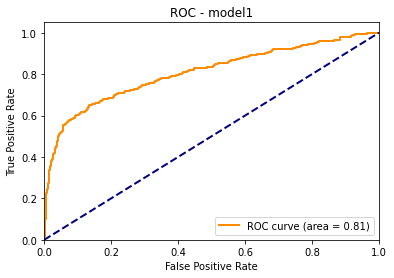

In [38]:
y_score = model1.predict_proba(X_test)[:, 1]

# 计算ROC曲线的相关指标
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - model1')
plt.legend(loc="lower right")
plt.show()

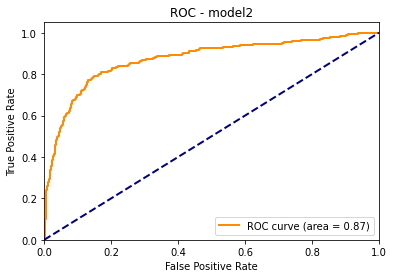

In [39]:
y_score = model2.predict_proba(X_test)[:, 1]

# 计算ROC曲线的相关指标
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - model2')
plt.legend(loc="lower right")
plt.show()

In [40]:
# Randomforest
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)

In [41]:
print('Accuracy for model rf is ',metrics.accuracy_score(prediction_rf,y_test))
print('precision',precision_score(y_test, prediction_rf, average='binary'))
print('recall',recall_score(y_test, prediction_rf, average='binary'))
print('f1_score',f1_score(y_test, prediction_rf, average='binary'))

Accuracy for model rf is  0.8983577452285841
precision 0.7381818181818182
recall 0.5638888888888889
f1_score 0.6393700787401576


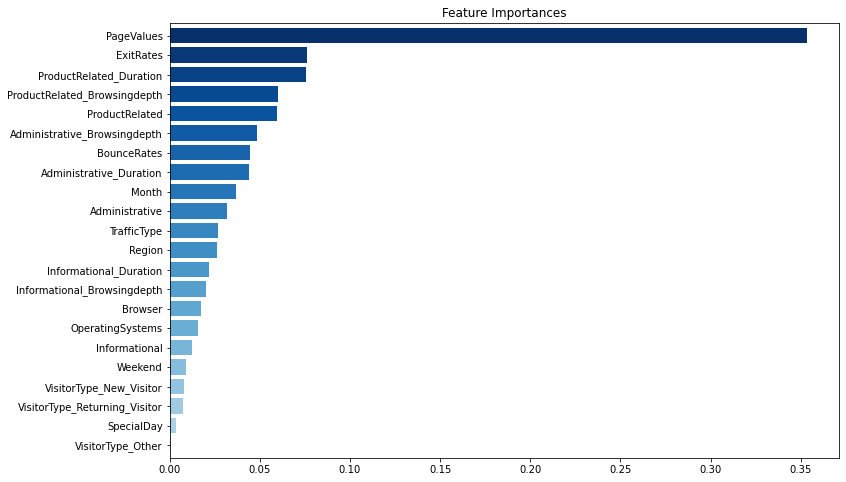

In [42]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=True)
colors = plt.cm.Blues(np.linspace(0.3, 1, len(sorted_importances)))

plt.figure(figsize= (12,8))
sorted_importances.plot(kind='barh', width=0.8, color=colors)
plt.title("Feature Importances")
plt.show()